<a href="https://colab.research.google.com/github/songokunr1/Data-Analyst/blob/master/The_best_wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Zadania do wykonania

1. Wczytaj zbiór Wine Quality Data dla win czerwonych i dokonaj preprocessingu:
  *   usuń niepotrzebne kolumny, jeśli trzeba
  *   wypełnij puste wartości jeśli istnieją
2. Co można zrobić, by poprawić jakość wina?
  *   które składniki są najbardziej powiązane z jakością wina?
  *   czy istnieją jakieś anomalie? Jeśli tak, to miały jakiś wpływ na jakość wina?
  *   czy istnieją jakieś zależności między składnikami?
  *   na podstawie powyższych analiz, spróbuj podać przepis na udane wino :) Uargumentuj swoją propozycję

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

In [ ]:
wine_df = pd.read_csv('https://raw.githubusercontent.com/songokunr1/Data-Analyst/master/winequality-red.csv', sep=';')

In [ ]:
wine_df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
wine_df['volatile acidity'].mean()

0.5278205128205131

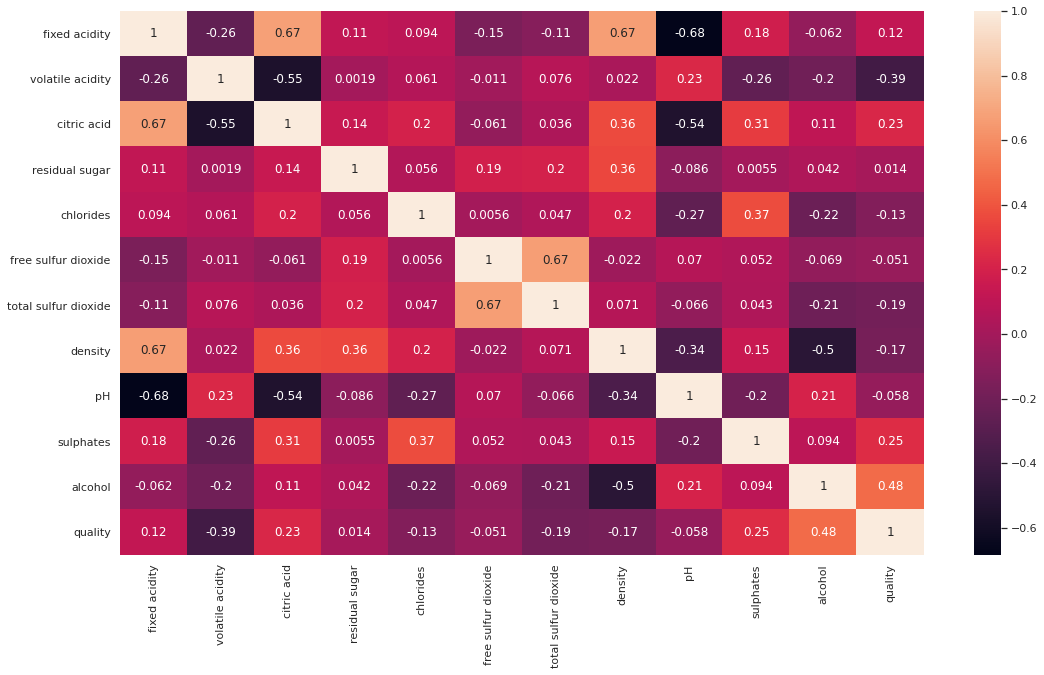

In [ ]:
plt.figure(figsize=(18,10))
correlatons = wine_df.corr()
sns.heatmap(correlatons, annot=True)

In [ ]:
wine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

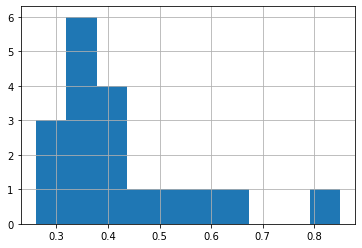

In [ ]:
wine_df[wine_df['quality'] == 8]['volatile acidity'].hist() 

In [ ]:
import numpy as np
quality_unique = np.sort(wine_df['quality'].unique())

In [ ]:
quality_unique

array([3, 4, 5, 6, 7, 8])

In [ ]:
quality = []
quality.append(wine_df[wine_df['quality'] == 8]['volatile acidity'].mean())
quality.append(wine_df[wine_df['quality'] == 7]['volatile acidity'].mean())
quality.append(wine_df[wine_df['quality'] == 6]['volatile acidity'].mean())
quality.append(wine_df[wine_df['quality'] == 5]['volatile acidity'].mean())
quality.append(wine_df[wine_df['quality'] == 4]['volatile acidity'].mean())
quality.append(wine_df[wine_df['quality'] == 3]['volatile acidity'].mean())
quality

[0.4233333333333334,
 0.4039195979899498,
 0.49748432601880965,
 0.5770411160058732,
 0.6939622641509429,
 0.8845000000000001]

In [ ]:
y_volatile_acidity = [wine_df[wine_df['quality'] == x]['volatile acidity'].mean() for x in quality_unique]


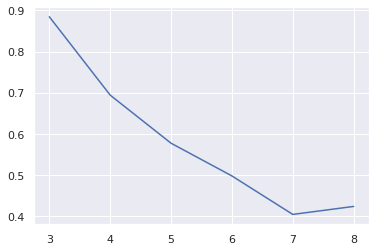

In [ ]:
plt.plot(quality_unique,y_volatile_acidity)

In [ ]:
y_alcohol = [wine_df[wine_df['quality'] == x]['alcohol'].mean() for x in quality_unique]



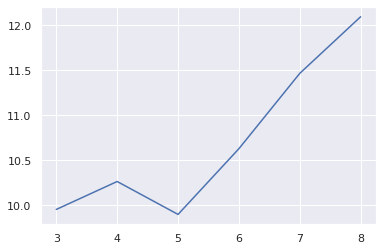

In [ ]:
plt.plot(quality_unique,y_alcohol)


In [ ]:
wine_df_few = wine_df.drop(['fixed acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'], axis=1, inplace=False) #axis =0 wiersze 1->kolumny
wine_df_few.head(5)

,volatile acidity,alcohol,quality
0,0.70,9.4,5
1,0.88,9.8,5
2,0.76,9.8,5
3,0.28,9.8,6
4,0.70,9.4,5


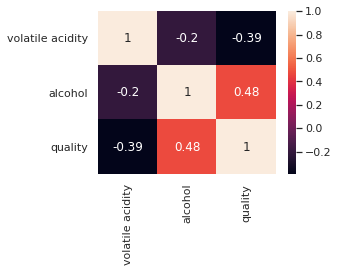

In [ ]:
plt.figure(figsize=(4,3))
correlatons = wine_df_few.corr()
sns.heatmap(correlatons, annot=True)

In [ ]:
np.std(wine_df_few['alcohol'])

1.0653343003437463

In [ ]:
np.mean(wine_df_few['alcohol'])

10.422983114446502

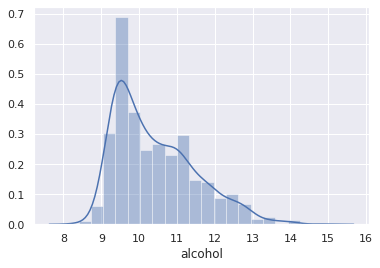

In [ ]:
sns.distplot(wine_df_few['alcohol'], bins=20, kde = True)

In [ ]:
y_alkohol = [wine_df[wine_df['quality'] == x]['alcohol'].mean() for x in quality_unique]

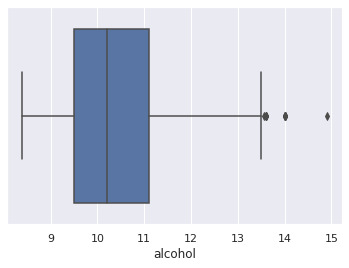

In [ ]:
sns.boxplot(x=wine_df_few['alcohol'])

In [ ]:
np.std(wine_df_few['volatile acidity'])

0.17900370424468975

In [ ]:
np.mean(wine_df_few['volatile acidity'])

0.5278205128205131

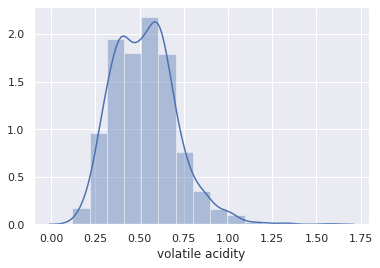

In [ ]:
sns.distplot(wine_df_few['volatile acidity'],bins=15)

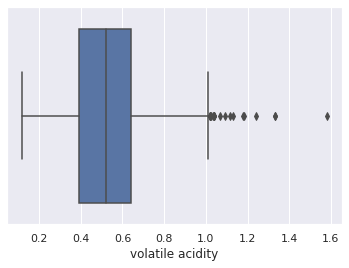

In [ ]:
sns.boxplot(x=wine_df_few['volatile acidity'])

In [ ]:
wine_df_few.head(5)